In [1]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from PIL import Image

digits = load_digits()
print(digits['data'][0])

Mounted at /content/drive
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


6


<Figure size 640x480 with 0 Axes>

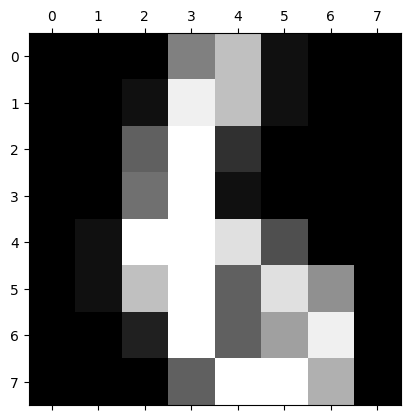

In [2]:
plt.gray()
its=223
plt.matshow(digits.images[its])
print(digits['target'][its])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
import sklearn
from copy import deepcopy

# scaler = sklearn.preprocessing.StandardScaler()
# digits.data=scaler.fit_transform(digits.data)
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.25,
                                                shuffle=True)
origt=deepcopy(Xtrain)
scaler = sklearn.preprocessing.StandardScaler()

Xtrain=scaler.fit_transform(Xtrain)
print(origt,Xtrain,Xtest)
for i in range(64):
  Xtest[:,i]=(Xtest[:,i]-np.mean(origt[:,i]))/(np.std(origt[:,i])+0.00000000000000000000000000000000001)

[[ 0.  0.  4. ... 11.  2.  0.]
 [ 0.  0. 13. ...  6.  0.  0.]
 [ 0.  0.  9. ... 12.  1.  0.]
 ...
 [ 0.  1. 15. ... 15. 11.  1.]
 [ 0.  1. 13. ...  3.  0.  0.]
 [ 0.  0.  6. ...  9.  0.  0.]] [[ 0.         -0.34349063 -0.25336187 ...  0.70719166 -0.04657869
  -0.20677369]
 [ 0.         -0.34349063  1.61041598 ... -0.13387065 -0.51831923
  -0.20677369]
 [ 0.         -0.34349063  0.78207027 ...  0.87540413 -0.28244896
  -0.20677369]
 ...
 [ 0.          0.76076206  2.02458884 ...  1.38004151  2.07625375
   0.29688664]
 [ 0.          0.76076206  1.61041598 ... -0.63850803 -0.51831923
  -0.20677369]
 [ 0.         -0.34349063  0.16081099 ...  0.37076674 -0.51831923
  -0.20677369]] [[ 0.  0.  2. ... 10.  1.  0.]
 [ 0.  0.  3. ...  3.  0.  0.]
 [ 0.  0.  5. ... 12.  9.  0.]
 ...
 [ 0.  0.  6. ... 12.  0.  0.]
 [ 0.  0.  2. ... 16.  3.  0.]
 [ 0.  1.  7. ... 11.  1.  0.]]


In [5]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(Xtrain, ytrain)

LogisticRegression()

In [6]:

print(Xtest)
print("Accuracy:", lr_model.score(Xtest, ytest))

[[ 0.         -0.34349063 -0.66753472 ...  0.5389792  -0.28244896
  -0.20677369]
 [ 0.         -0.34349063 -0.46044829 ... -0.63850803 -0.51831923
  -0.20677369]
 [ 0.         -0.34349063 -0.04627544 ...  0.87540413  1.60451321
  -0.20677369]
 ...
 [ 0.         -0.34349063  0.16081099 ...  0.87540413 -0.51831923
  -0.20677369]
 [ 0.         -0.34349063 -0.66753472 ...  1.54825397  0.18929158
  -0.20677369]
 [ 0.          0.76076206  0.36789742 ...  0.70719166 -0.28244896
  -0.20677369]]
Accuracy: 0.9688888888888889


In [7]:
ypred=lr_model.predict(Xtest)
pd.crosstab(ypred,ytest)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,56,0,0,0,0,0,0,0,0,0
1,0,37,0,0,1,1,1,0,1,2
2,0,0,41,0,0,0,0,0,1,0
3,0,0,1,43,0,0,0,0,0,0
4,0,0,0,0,32,0,1,0,1,0
5,0,0,0,0,0,51,0,0,1,0
6,0,0,0,0,0,0,47,0,0,0
7,0,0,0,0,0,0,0,47,0,0
8,0,0,0,0,0,0,0,0,40,1


4


<Figure size 640x480 with 0 Axes>

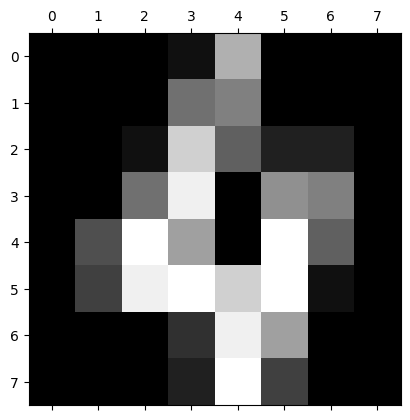

4


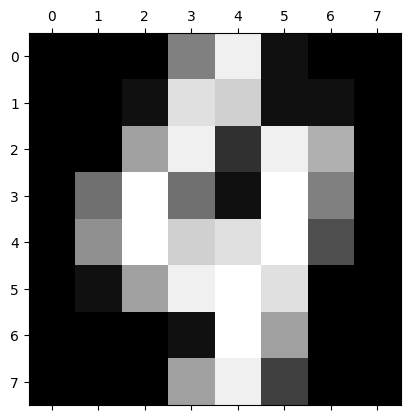

4


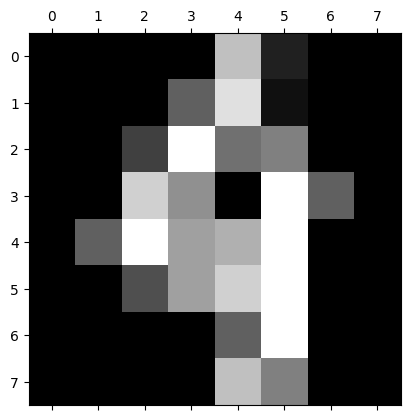

4


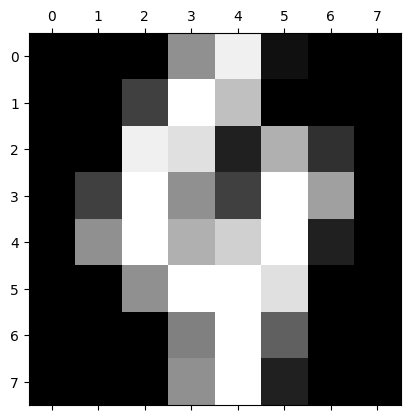

4


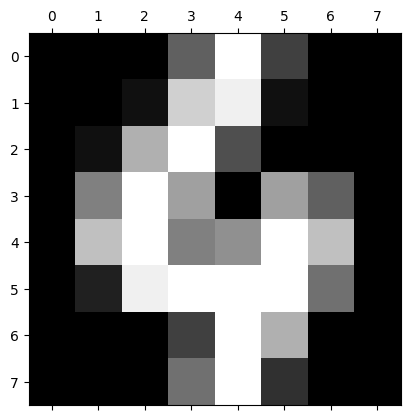

4


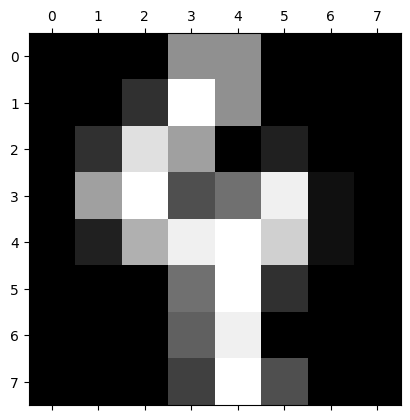

4


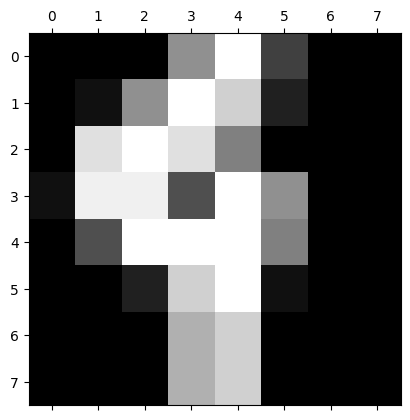

4


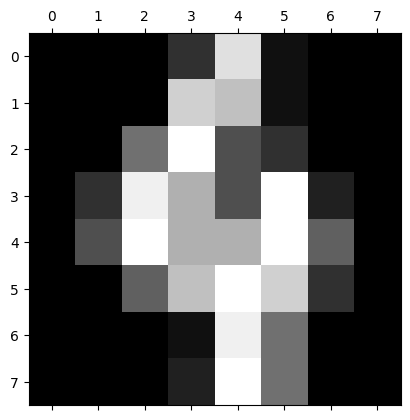

4


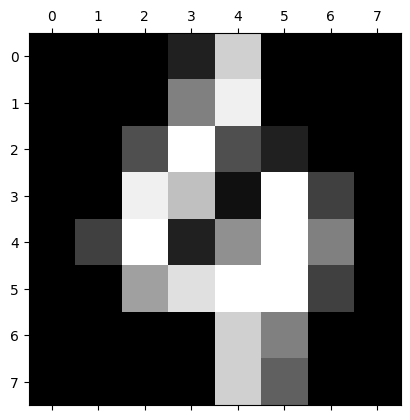

4


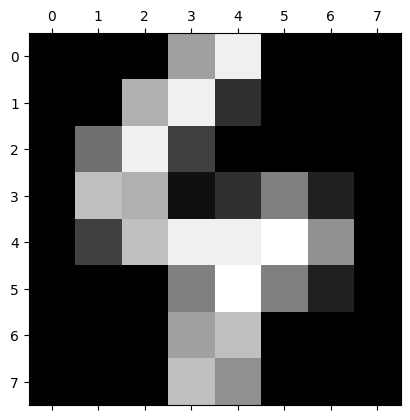

4


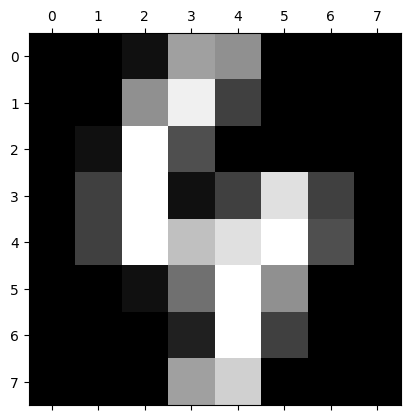

4


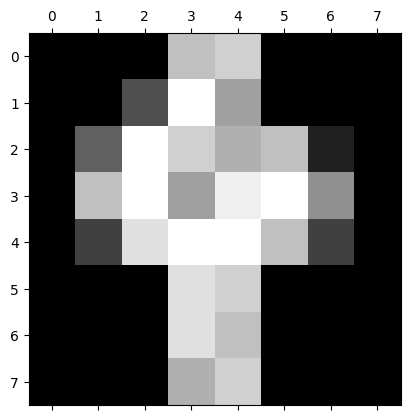

4


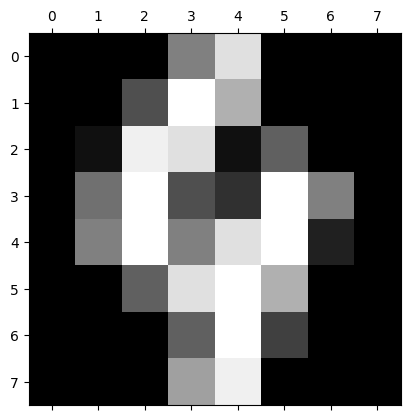

4


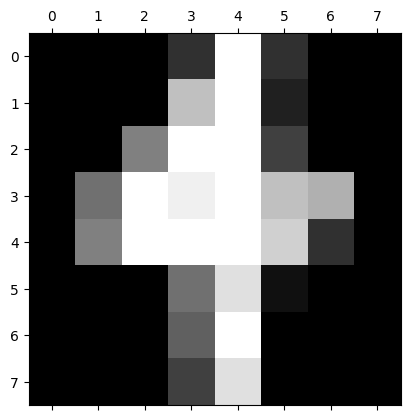

4


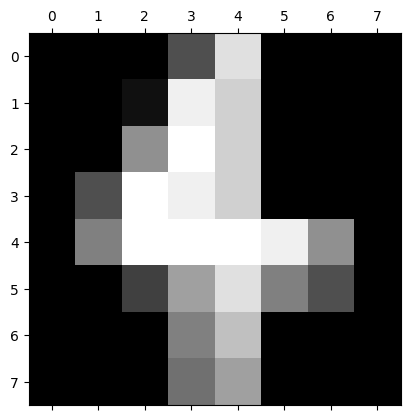

4


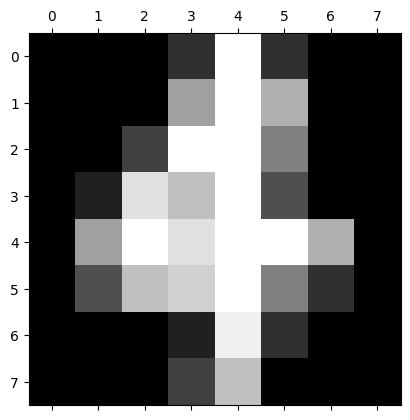

4


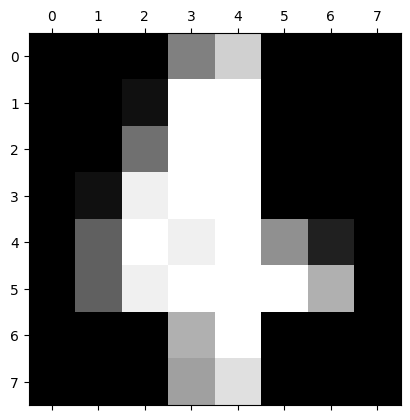

4


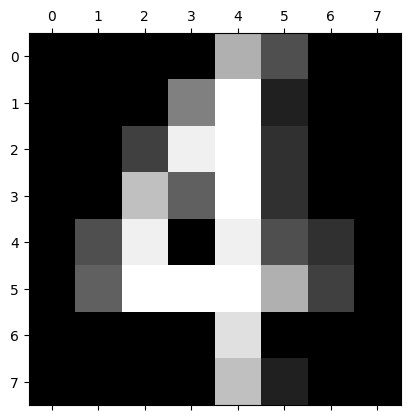

4


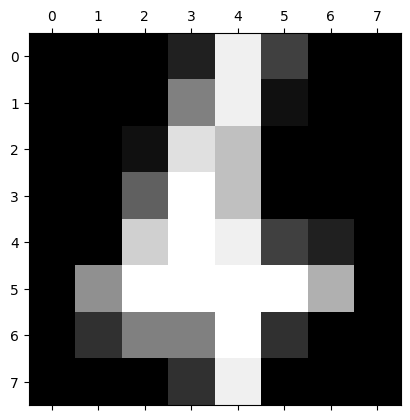

4


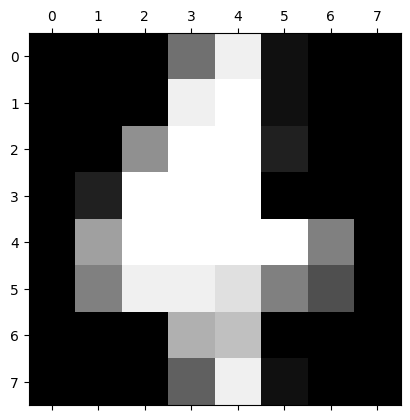

4


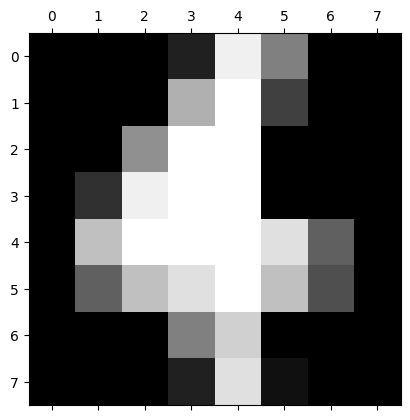

4


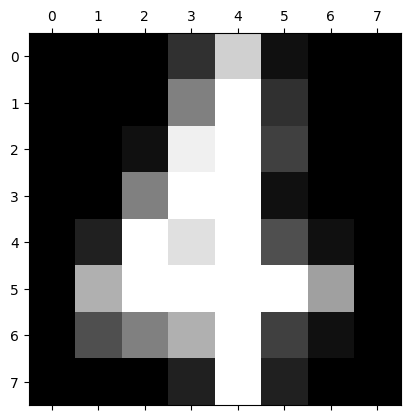

4


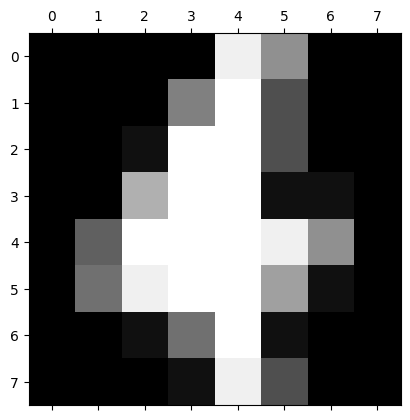

4


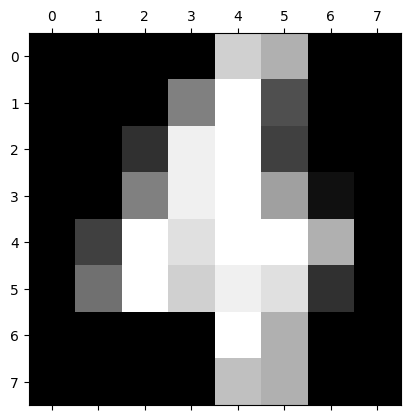

4


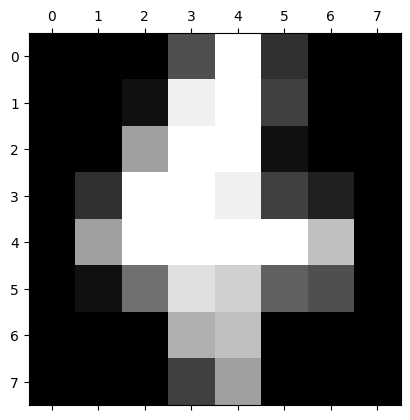

4


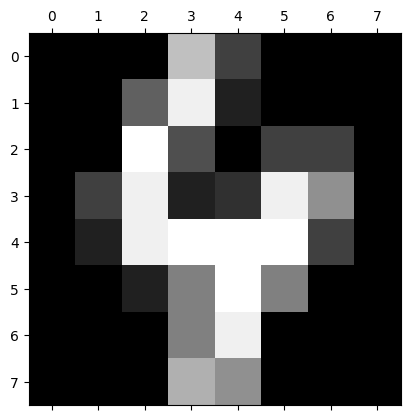

4


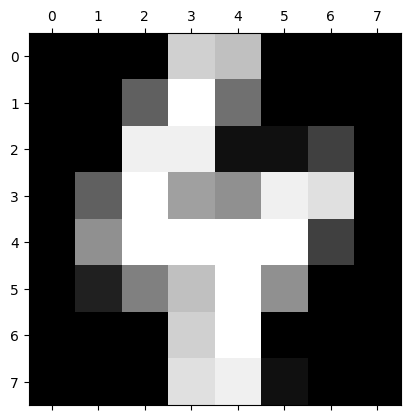

4


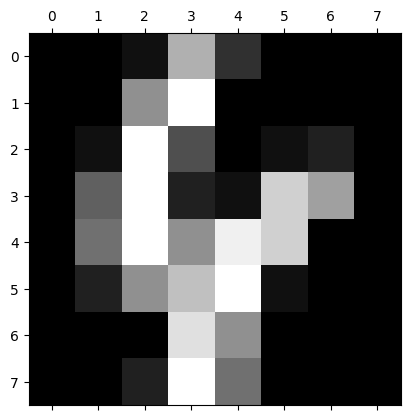

4


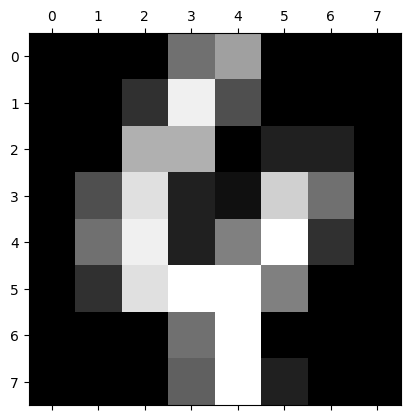

In [8]:
ypred1=lr_model.predict(digits['data'])
plt.gray()
#its=679
for i in range(300):
  if digits['target'][i]==4:
    plt.matshow(digits.images[i])
    print(digits['target'][i])
    plt.show()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


<Figure size 640x480 with 0 Axes>

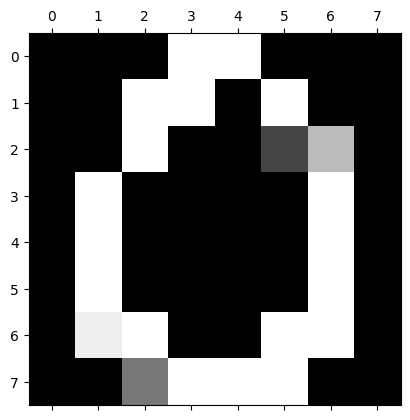

This digit is 0


In [9]:
import cv2,math
img_path = '/content/drive/My Drive/Screenshot 2022-08-05 214454.png'
#img_path ='/content/drive/My Drive/20220805_194834.jpg'
img = cv2.imread(img_path, 0)
print(img)
img=cv2.resize(img,(8,8),)

img=np.floor((255-img)/16)

plt.gray()

plt.matshow(img)
plt.show()
#cv2.imshow("Resized image", img)
flat=img.flatten(order='C')
for i in range(flat.shape[0]):
  flat[i]=(flat[i]-np.mean(origt[:,i]))/(np.std(origt[:,i])+0.00000000000000000000000000000000001)
#print(flat)

print('This digit is '+str(lr_model.predict(np.array([flat]))[0]))
